In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df_call=pd.read_csv('FINAL CALL DATA.csv')
df_call

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [3]:
n = len(df_call)
n_train =  (int)(0.7 * n)
print(n_train)

193907


In [4]:
train = df_call[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]', ' [C_DELTA]', 
                 ' [C_GAMMA]', ' [C_VEGA]', ' [C_THETA]', ' [C_RHO]' ]].values
y_train = train[' [C_LAST]'].values

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [6]:
X_train_scaled=scaler.fit_transform(X_train)

In [7]:
y_train.shape

(193907,)

In [8]:
y_train=y_train.reshape(-1,1)
y_train_scaled=scaler.fit_transform(y_train)

In [9]:
y_train_scaled.shape

(193907, 1)

In [10]:
y_train_scaled2=np.ravel(y_train_scaled)

In [11]:
y_train_scaled2.shape

(193907,)

In [12]:
from sklearn import svm
reg_SVM_greeks = svm.SVR()
reg_SVM_greeks.fit(X_train_scaled, y_train_scaled2)

SVR()

In [13]:
y_pred=reg_SVM_greeks.predict(X_train_scaled)

In [14]:
y_pred=scaler.inverse_transform(y_pred)

In [15]:
train['Call_SVM']=y_pred
train

<ipython-input-15-74c1a1bf2825>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Call_SVM']=y_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_SVM
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476,21.877600
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862,19.662040
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204,16.475165
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256,17.096233
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163,11.880031
...,...,...,...,...,...,...,...,...,...,...,...,...
193902,179.02,1.649425,0.65827,0.00573,0.84465,-0.02014,1.41244,0.28033,32.60,165.0,35.369786,33.749388
193903,179.02,1.649425,0.62671,0.00588,0.87102,-0.02038,1.36556,0.27820,30.90,170.0,32.577601,31.019993
193904,179.02,1.649425,0.59577,0.00612,0.89144,-0.02070,1.31353,0.27681,27.13,175.0,29.994880,28.480267
193905,179.02,1.649425,0.56406,0.00628,0.90553,-0.02039,1.25991,0.27454,24.73,180.0,27.482092,25.866925


In [16]:
y_true=train[' [C_LAST]']
y_pred=train['Call_SVM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.8037590665338397
MSE =  15.030912708910806
RMSE =  3.876972105768986


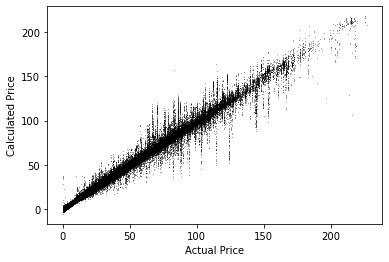

In [17]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

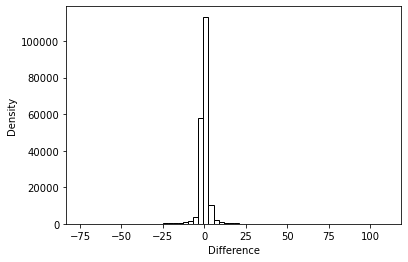

In [18]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [19]:
test = df_call[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]', ' [C_DELTA]', 
                 ' [C_GAMMA]', ' [C_VEGA]', ' [C_THETA]', ' [C_RHO]']].values
y_test = test[' [C_LAST]'].values

In [20]:
X_test_scaled=scaler.fit_transform(X_test)
y_test=y_test.reshape(-1,1)
y_test_scaled=scaler.fit_transform(y_test)
y_test_scaled2=np.ravel(y_test_scaled)

In [21]:
y_pred_test=reg_SVM_greeks.predict(X_test_scaled)

In [22]:
y_pred_test=scaler.inverse_transform(y_pred_test)

In [23]:
print(y_pred_test)

[18.1787316  16.7550856  15.30111136 ... 28.77035948 31.42660226
 34.08620779]


In [24]:
test

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
193908,179.02,1.649425,0.47056,0.00645,0.91520,-0.02033,1.08559,0.26887,18.55,195.0,20.895615
193909,179.02,1.649425,0.44009,0.00641,0.90725,-0.02019,1.02520,0.26711,16.70,200.0,18.986668
193910,179.02,1.649425,0.41070,0.00633,0.89419,-0.01936,0.96454,0.26497,14.95,205.0,17.174165
193911,179.02,1.649425,0.38230,0.00629,0.87701,-0.01918,0.90546,0.26478,13.60,210.0,15.664548
193912,179.02,1.649425,0.35522,0.00610,0.85580,-0.01888,0.84713,0.26322,12.55,215.0,14.150901
...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [25]:
test['Call_SVM']=y_pred_test

<ipython-input-25-f3dd18f1bb87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Call_SVM']=y_pred_test


In [26]:
test

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_SVM
193908,179.02,1.649425,0.47056,0.00645,0.91520,-0.02033,1.08559,0.26887,18.55,195.0,20.895615,18.178732
193909,179.02,1.649425,0.44009,0.00641,0.90725,-0.02019,1.02520,0.26711,16.70,200.0,18.986668,16.755086
193910,179.02,1.649425,0.41070,0.00633,0.89419,-0.01936,0.96454,0.26497,14.95,205.0,17.174165,15.301111
193911,179.02,1.649425,0.38230,0.00629,0.87701,-0.01918,0.90546,0.26478,13.60,210.0,15.664548,14.354942
193912,179.02,1.649425,0.35522,0.00610,0.85580,-0.01888,0.84713,0.26322,12.55,215.0,14.150901,13.534446
...,...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778,19.610598
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164,21.719472
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698,28.770359
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689,31.426602


In [27]:
y_true=test[' [C_LAST]']
y_pred=test['Call_SVM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  9.580020188204582
MSE =  139.52501931500413
RMSE =  11.812070915593257


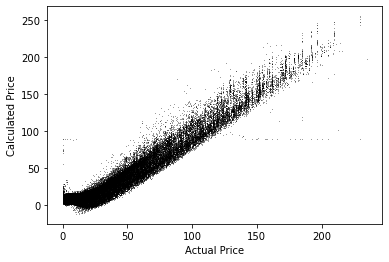

In [28]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

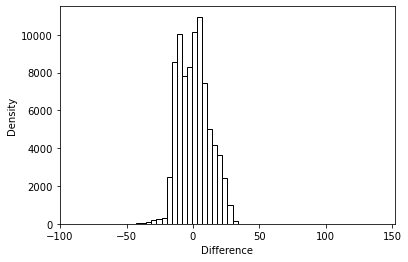

In [29]:
tats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [34]:
# train.to_csv('SVM GREEKS train FINAL Results.csv', mode='a', index=False, header=True)
# test.to_csv('SVM GREEKS test FINAL Results.csv', mode='a', index=False, header=True)

In [35]:
# import pickle
# filename = 'Call_SVM_greeks.sav'
# pickle.dump(reg_SVM_greeks, open(filename, 'wb'))


In [32]:
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

In [33]:
# from sklearn.model_selection import GridSearchCV

# params_grid = {'kernel' : ['rbf'], 'C' : [0.1, 1], 'epsilon' : [0.1, 0.01, 1]}
# optimal_params = GridSearchCV(svm.SVR(), params_grid, cv=5, scoring='neg_mean_absolute_error',  n_jobs=6, verbose=2)
# optimal_params.fit(X_train_scaled, y_train_scaled2)
# print(optimal_params.best_params_)
